In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

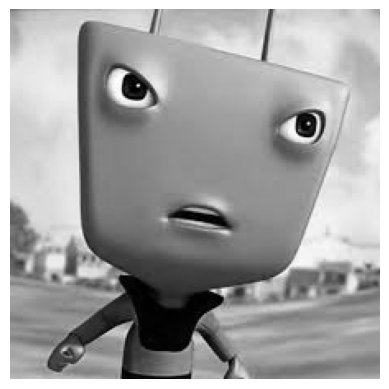

In [14]:
adudu = plt.imread('Assets/adudu.jpg')
adudu = cv.cvtColor(adudu, cv.COLOR_BGR2GRAY)

plt.imshow(adudu, cmap='gray')
plt.axis('off')

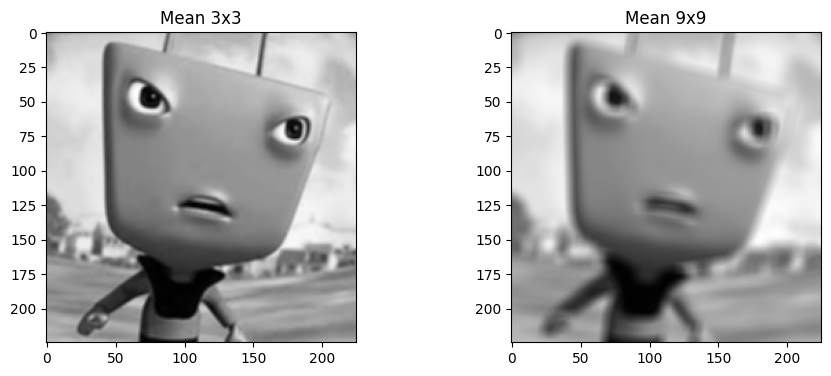

In [15]:
def filter_mean(citra, ukuran_kernel):
    pad = ukuran_kernel // 2
    citra_dipad = np.pad(citra, (pad, pad), 'edge')
    citra_filter = np.zeros_like(citra)
    for i in range(pad, citra.shape[0] + pad):
        for j in range(pad, citra.shape[1] + pad):
            kernel = citra_dipad[i - pad:i + pad + 1, j - pad:j + pad + 1]
            citra_filter[i - pad, j - pad] = np.mean(kernel)
    
    return citra_filter


mean_3 = filter_mean(adudu, 3)
mean_9 = filter_mean(adudu, 9)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(mean_3, 'gray')
axs[1].imshow(mean_9, 'gray')

axs[0].set_title('Mean 3x3')
axs[1].set_title('Mean 9x9')
plt.subplots_adjust(wspace=0.5)
plt.show()

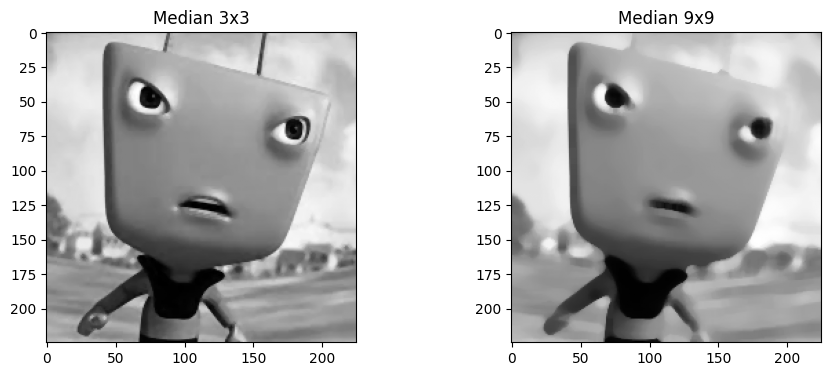

In [16]:
def filter_median(citra, ukurankernel):
    pad = ukurankernel // 2
    pad_pict = np.pad(citra, (pad, pad), 'edge')
    filter_pict = np.zeros_like(citra)
    for i in range(pad, citra.shape[0] + pad):
        for j in range(pad, citra.shape[1] + pad):
            kernel = pad_pict[i - pad:i + pad + 1, j - pad:j + pad + 1]
            median_value = np.median(kernel)
            filter_pict[i - pad, j - pad] = median_value
    
    return filter_pict

median_3 = filter_median(adudu, 3)
median_9 = filter_median(adudu, 9)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(median_3, 'gray')
axs[1].imshow(median_9, 'gray')

axs[0].set_title('Median 3x3')
axs[1].set_title('Median 9x9')
plt.subplots_adjust(wspace=0.5)
plt.show()

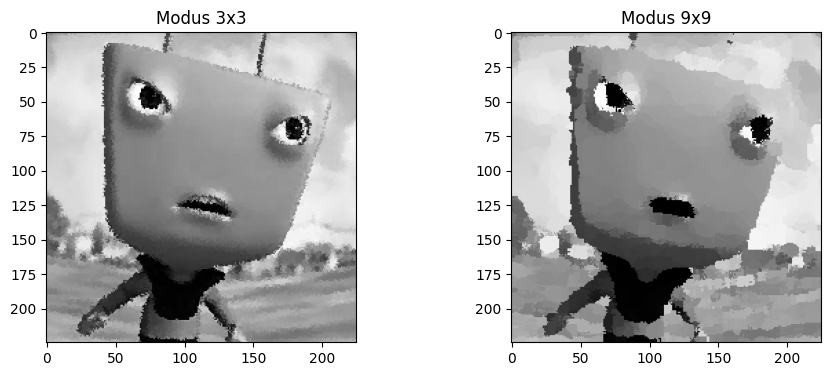

In [17]:
def filter_modus(citra, ukuran_kernel):
    pad = ukuran_kernel // 2
    pad_pict = np.pad(citra, (pad, pad), 'edge')
    filter_pict = np.zeros_like(citra)
    for i in range(pad, citra.shape[0] + pad):
        for j in range(pad, citra.shape[1] + pad):
            kernel = pad_pict[i - pad:i + pad + 1, j - pad:j + pad + 1]
            filter_pict[i - pad, j - pad] = hitung_modus(kernel)
    
    return filter_pict

def hitung_modus(kernel):
    unique, counts = np.unique(kernel, return_counts=True)
    modus_indices = np.where(counts == np.max(counts))[0]
    return unique[np.random.choice(modus_indices)]

modus_3 = filter_modus(adudu, 3)
modus_9 = filter_modus(adudu, 9)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(modus_3, 'gray')
axs[1].imshow(modus_9, 'gray')
axs[0].set_title('Modus 3x3')
axs[1].set_title('Modus 9x9')
plt.subplots_adjust(wspace=0.5)
plt.show()

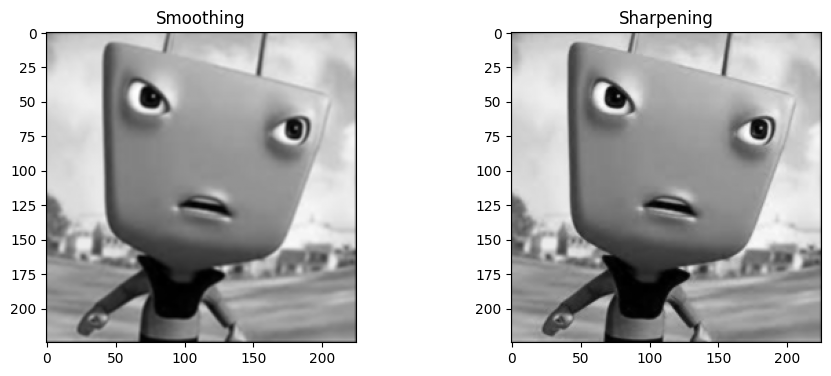

In [24]:
kernel_smoothing = ([[1/10,1/10,1/10],
                     [1/10,1/5,1/10],
                     [1/10,1/10,1/10]])
kernel_sharpening = ([[1/9,1/9,1/9],
                     [1/9,8/9,1/9],
                     [1/9,1/9,1/9]])

kernel_smoothing = np.array(kernel_smoothing)
kernel_sharpening = np.array(kernel_sharpening)


def filter_convolution(image, kernel):
    
    pad_size = kernel.shape[0] // 2
    gambar_input = np.pad(image, pad_size, mode='constant')

    gambar_konvolusi = np.zeros_like(image).astype(np.float32)

    baris, kolom = image.shape

    for i in range(baris):
        for j in range(kolom):
            gambar_konvolusi[i, j] = np.sum(gambar_input[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)

    return gambar_konvolusi


adudu_smoothing = filter_convolution(adudu, kernel_smoothing)
adudu_sharpening = filter_convolution(adudu, kernel_sharpening)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(adudu_smoothing, 'gray')
axs[1].imshow(adudu_sharpening, 'gray')
axs[0].set_title('Smoothing')
axs[1].set_title('Sharpening')
plt.subplots_adjust(wspace=0.5)
plt.show()


In [19]:
def robert(image):
    rx = np.array([[1, 0], [0, -1]])
    ry = np.array([[0, 1], [-1, 0]])

    tinggi, lebar = image.shape

    edges = np.zeros((tinggi, lebar))
    edge_x = np.zeros((tinggi, lebar))
    edge_y = np.zeros((tinggi, lebar))

    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    for i in range(tinggi):
        for j in range(lebar):
            patch = padded_image[i:i+2, j:j+2]
            gradient_x = np.sum(patch * rx)
            gradient_y = np.sum(patch * ry)

            edge_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

            edges[i, j] = edge_magnitude
            edge_x[i, j] = abs(gradient_x)
            edge_y[i, j] = abs(gradient_y)

    return edges, edge_x, edge_y

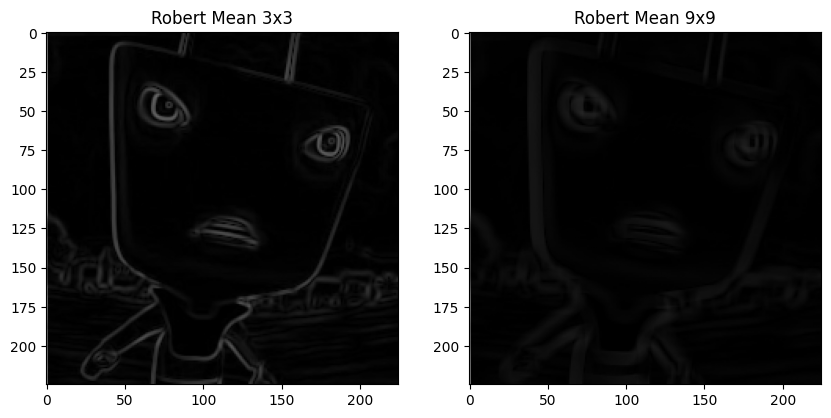

In [20]:
rob_mean3, robx_mean3, robx_mean3 = robert(mean_3)
rob_mean9, roby_mean9, roby_mean9 = robert(mean_9)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(rob_mean3, 'gray')
axs[0].set_title('Robert Mean 3x3')
axs[1].imshow(rob_mean9, 'gray')
axs[1].set_title('Robert Mean 9x9')
plt.show()

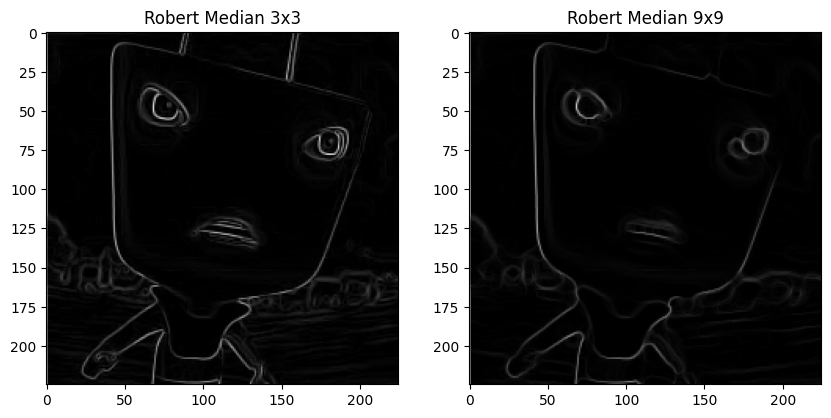

In [21]:
rob_median3, robx_median3, roby_median3 = robert(median_3)
rob_median9, robx_median9, roby_median9 = robert(median_9)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(rob_median3, 'gray')
axs[0].set_title('Robert Median 3x3')
axs[1].imshow(rob_median9, 'gray')
axs[1].set_title('Robert Median 9x9')
plt.show()

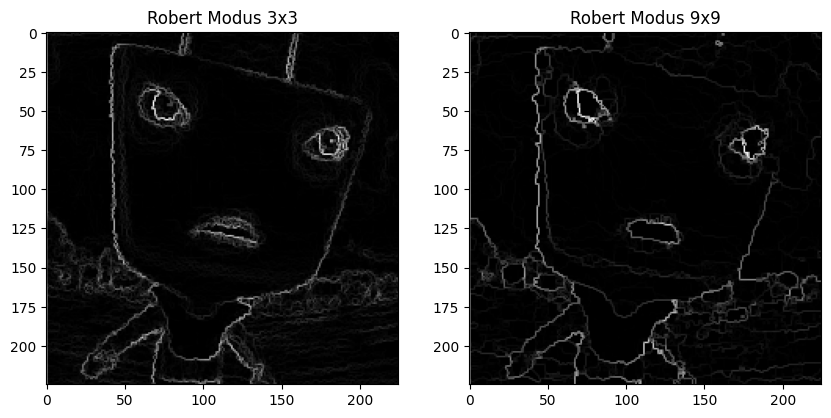

In [22]:
rob_modus3, robx_modus3, roby_modus3 = robert(modus_3)
rob_modus9, robx_modus9, roby_modus9 = robert(modus_9)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(rob_modus3, 'gray')
axs[0].set_title('Robert Modus 3x3')
axs[1].imshow(rob_modus9, 'gray')
axs[1].set_title('Robert Modus 9x9')
plt.show()

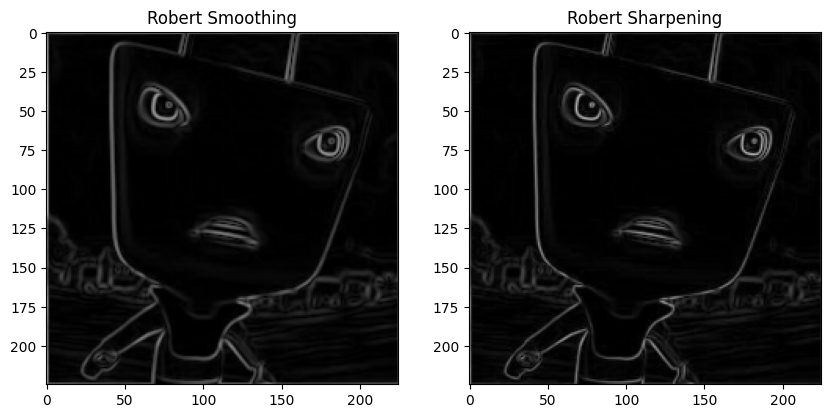

In [25]:
rob_smoothed, robx_smoothed, roby_smoothed = robert(adudu_smoothing)
rob_sharpened, robx_sharpened, roby_sharpened = robert(adudu_sharpening)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(rob_smoothed, 'gray')
axs[0].set_title('Robert Smoothing')
axs[1].imshow(rob_sharpened, 'gray')
axs[1].set_title('Robert Sharpening')
plt.show()

In [26]:
def sobel_prewitt(image, kx, ky):
    tinggi, lebar = image.shape
    edges = np.zeros((tinggi, lebar))
    edge_x = np.zeros((tinggi, lebar))
    edge_y = np.zeros((tinggi, lebar))
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    for i in range(1, tinggi + 1):
        for j in range(1, lebar + 1):
            gradient_x = np.sum(np.multiply(padded_image[i-1:i+2, j-1:j+2], kx))
            gradient_y = np.sum(np.multiply(padded_image[i-1:i+2, j-1:j+2], ky))

            edge_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
            edges[i-1, j-1] = edge_magnitude
            edge_x[i-1, j-1] = abs(gradient_x)
            edge_y[i-1, j-1] = abs(gradient_y)

    return edges, edge_x, edge_y

sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
sy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

px = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
py = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

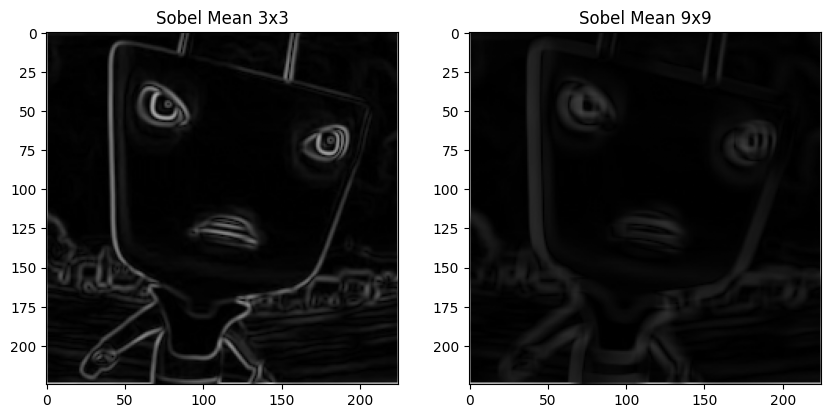

In [27]:
sob_mean3, sobx_mean3, soby_mean3 = sobel_prewitt(mean_3, sx, sy)
sob_mean9, sobx_mean9, soby_mean9 = sobel_prewitt(mean_9, sx, sy)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(sob_mean3, 'gray')
axs[0].set_title('Sobel Mean 3x3')
axs[1].imshow(sob_mean9, 'gray')
axs[1].set_title('Sobel Mean 9x9')
plt.show()

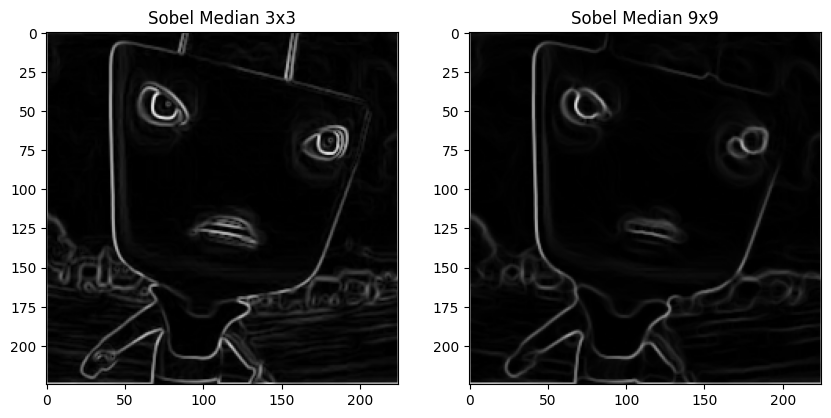

In [28]:
sob_median3, sobx_median3, soby_median3 = sobel_prewitt(median_3, sx, sy)
sob_median9, sobx_median9, soby_median9 = sobel_prewitt(median_9, sx, sy)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(sob_median3, 'gray')
axs[0].set_title('Sobel Median 3x3')
axs[1].imshow(sob_median9, 'gray')
axs[1].set_title('Sobel Median 9x9')
plt.show()

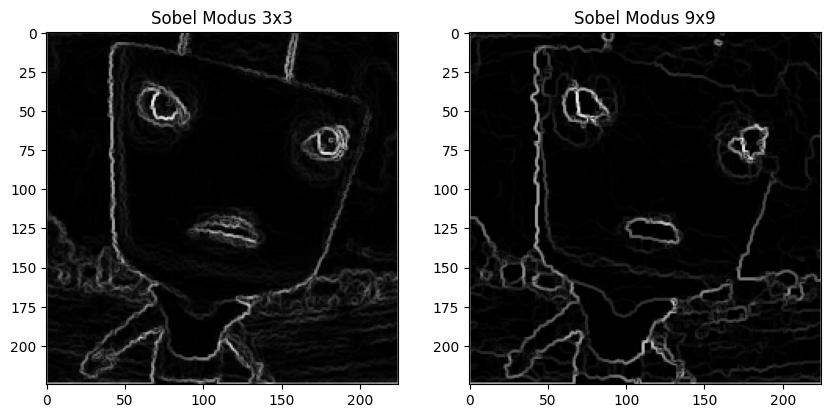

In [29]:
sob_modus3, sobx_modus3, soby_modus3 = sobel_prewitt(modus_3, sx, sy)
sob_modus9, sobx_modus9, soby_modus9 = sobel_prewitt(modus_9, sx, sy)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(sob_modus3, 'gray')
axs[0].set_title('Sobel Modus 3x3')
axs[1].imshow(sob_modus9, 'gray')
axs[1].set_title('Sobel Modus 9x9')
plt.show()

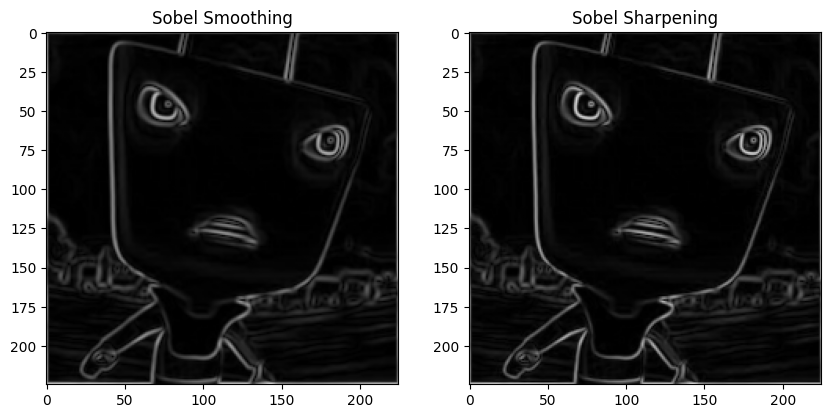

In [30]:
sob_smoothed, sobx_smoothed, soby_smoothed = sobel_prewitt(adudu_smoothing, sx, sy)
sob_sharpened, sobx_sharpened, soby_sharpened = sobel_prewitt(adudu_sharpening, sx, sy)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(sob_smoothed, 'gray')
axs[0].set_title('Sobel Smoothing')
axs[1].imshow(sob_sharpened, 'gray')
axs[1].set_title('Sobel Sharpening')
plt.show()

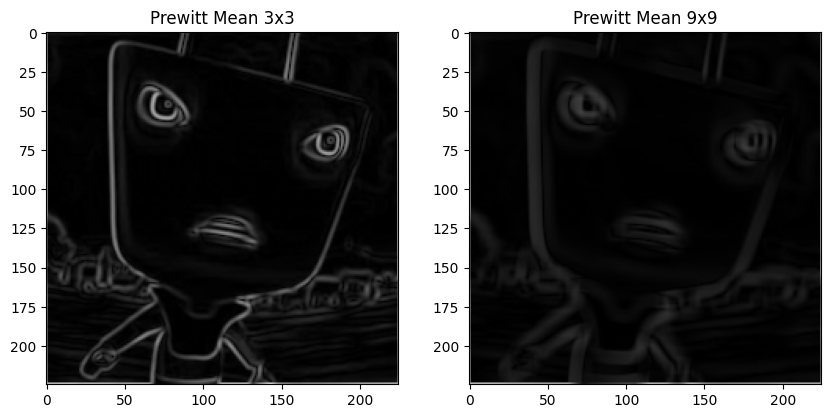

In [31]:
pre_mean3, prex_mean3, prey_mean3 = sobel_prewitt(mean_3, px, py)
pre_mean9, prex_mean9, prey_mean9 = sobel_prewitt(mean_9, px, py)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(pre_mean3, 'gray')
axs[0].set_title('Prewitt Mean 3x3')
axs[1].imshow(pre_mean9, 'gray')
axs[1].set_title('Prewitt Mean 9x9')
plt.show()

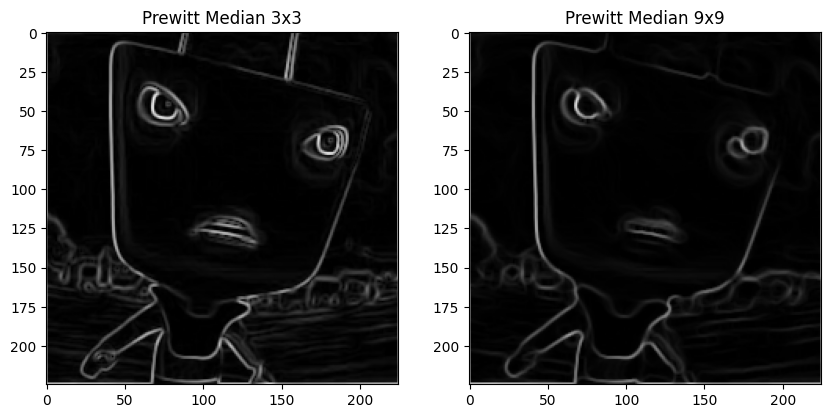

In [32]:
pre_median3, prex_median3, prey_median3 = sobel_prewitt(median_3, px, py)
pre_median9, prex_median9, prey_median9 = sobel_prewitt(median_9, px, py)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(pre_median3, 'gray')
axs[0].set_title('Prewitt Median 3x3')
axs[1].imshow(pre_median9, 'gray')
axs[1].set_title('Prewitt Median 9x9')
plt.show()

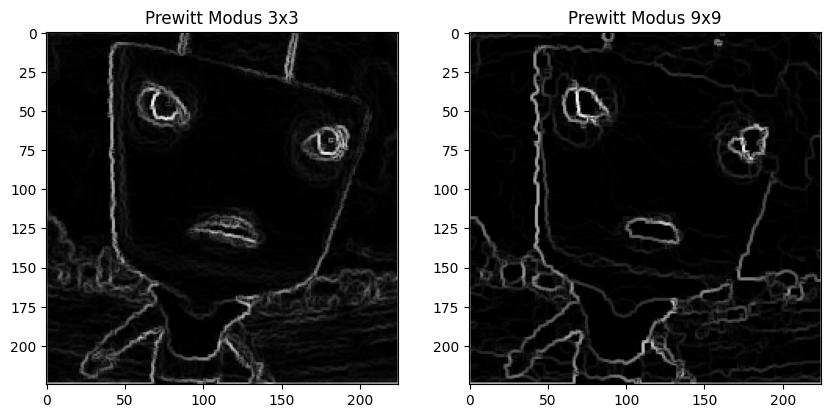

In [ ]:
pre_modus3, prex_modus3, prey_modus3 = sobel_prewitt(modus_3, px, py)
pre_modus9, prex_modus9, prey_modus9 = sobel_prewitt(modus_9, px, py)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(pre_modus3, 'gray')
axs[0].set_title('Prewitt Modus 3x3')
axs[1].imshow(pre_modus9, 'gray')
axs[1].set_title('Prewitt Modus 9x9')
plt.show()

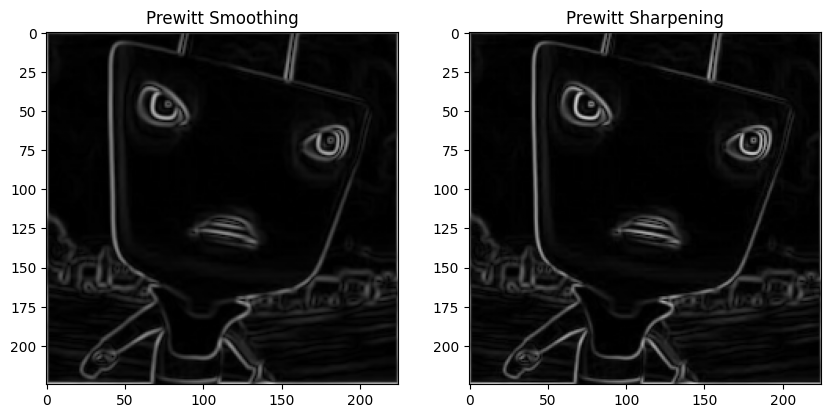

In [35]:
pre_smoothed, prex_smoothed, prey_smoothed = sobel_prewitt(adudu_smoothing, px, py)
pre_sharpened, prex_sharpened, prey_sharpened = sobel_prewitt(adudu_sharpening, px, py)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(pre_smoothed, 'gray')
axs[0].set_title('Prewitt Smoothing')
axs[1].imshow(pre_sharpened, 'gray')
axs[1].set_title('Prewitt Sharpening')
plt.show()

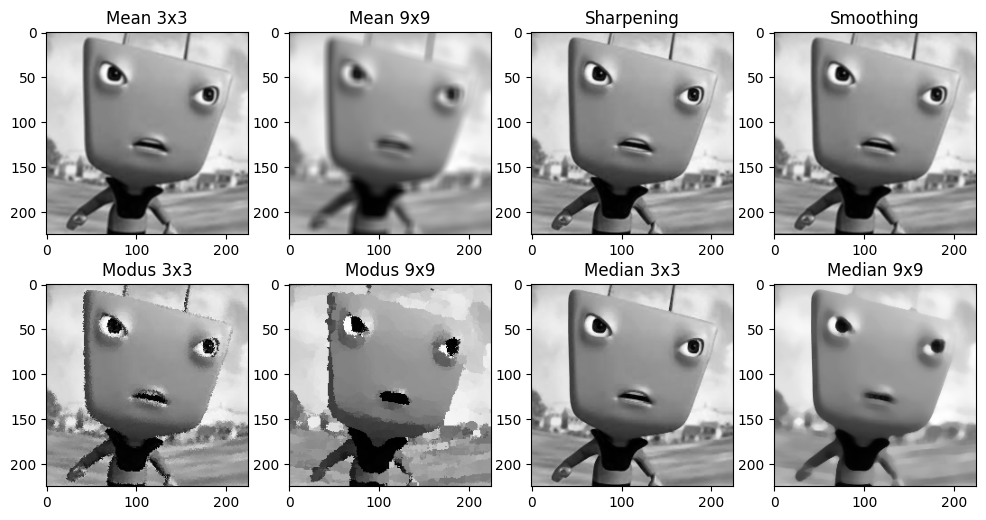

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs[0, 0].imshow(mean_3, 'gray')
axs[0, 1].imshow(mean_9, 'gray')
axs[0, 2].imshow(adudu_sharpening, 'gray')
axs[0, 3].imshow(adudu_smoothing, 'gray')
axs[1, 0].imshow(modus_3, 'gray')
axs[1, 1].imshow(modus_9, 'gray')
axs[1, 2].imshow(median_3, 'gray')
axs[1, 3].imshow(median_9, 'gray')

axs[0, 0].set_title('Mean 3x3')
axs[0, 1].set_title('Mean 9x9')
axs[0, 2].set_title('Sharpening')
axs[0, 3].set_title('Smoothing')
axs[1, 0].set_title('Modus 3x3')
axs[1, 1].set_title('Modus 9x9')
axs[1, 2].set_title('Median 3x3')
axs[1, 3].set_title('Median 9x9')
plt.show()


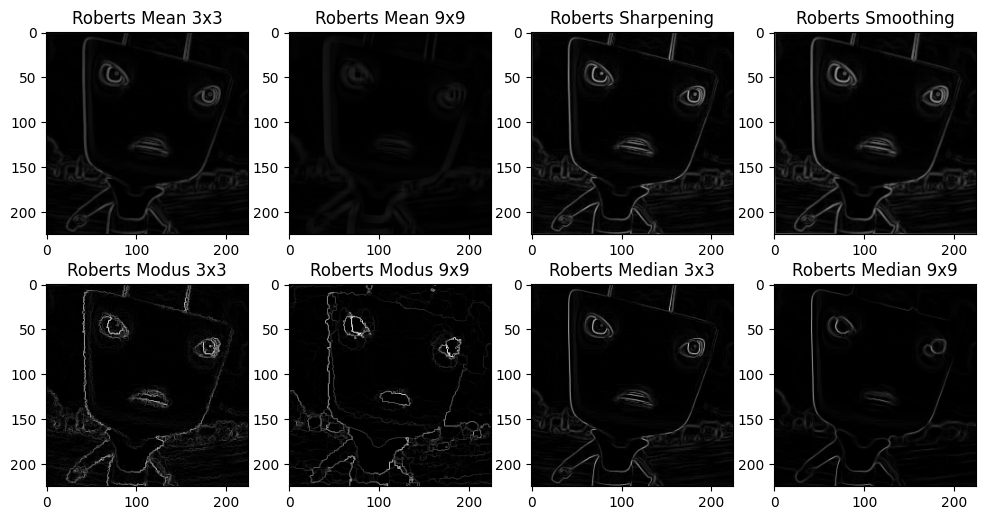

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs[0, 0].imshow(rob_mean3, 'gray')
axs[0, 1].imshow(rob_mean9, 'gray')
axs[0, 2].imshow(rob_sharpened, 'gray')
axs[0, 3].imshow(rob_smoothed, 'gray')
axs[1, 0].imshow(rob_modus3, 'gray')
axs[1, 1].imshow(rob_modus9, 'gray')
axs[1, 2].imshow(rob_median3, 'gray')
axs[1, 3].imshow(rob_median9, 'gray')

axs[0, 0].set_title('Roberts Mean 3x3')
axs[0, 1].set_title('Roberts Mean 9x9')
axs[0, 2].set_title('Roberts Sharpening')
axs[0, 3].set_title('Roberts Smoothing')
axs[1, 0].set_title('Roberts Modus 3x3')
axs[1, 1].set_title('Roberts Modus 9x9')
axs[1, 2].set_title('Roberts Median 3x3')
axs[1, 3].set_title('Roberts Median 9x9')
plt.show()

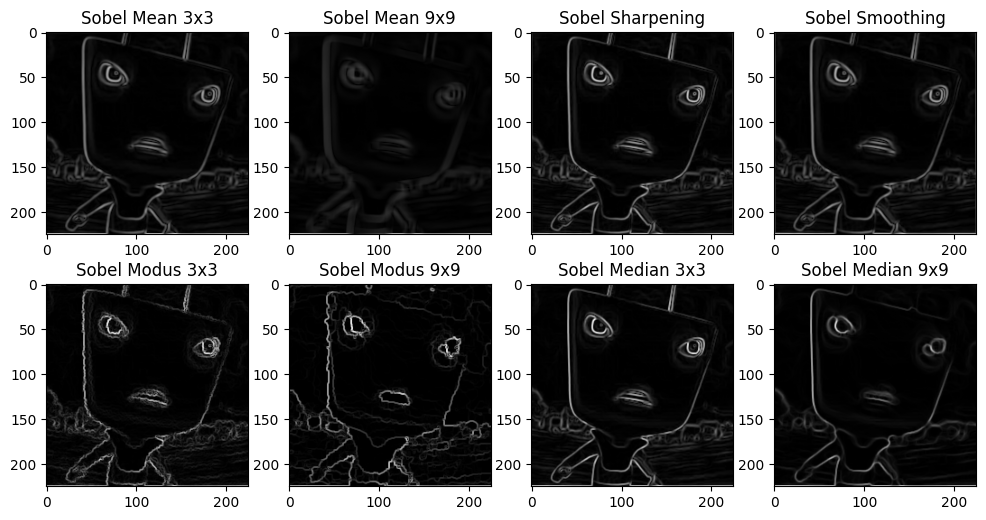

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs[0, 0].imshow(sob_mean3, 'gray')
axs[0, 1].imshow(sob_mean9, 'gray')
axs[0, 2].imshow(sob_sharpened, 'gray')
axs[0, 3].imshow(sob_smoothed, 'gray')
axs[1, 0].imshow(sob_modus3, 'gray')
axs[1, 1].imshow(sob_modus9, 'gray')
axs[1, 2].imshow(sob_median3, 'gray')
axs[1, 3].imshow(sob_median9, 'gray')

axs[0, 0].set_title('Sobel Mean 3x3')
axs[0, 1].set_title('Sobel Mean 9x9')
axs[0, 2].set_title('Sobel Sharpening')
axs[0, 3].set_title('Sobel Smoothing')
axs[1, 0].set_title('Sobel Modus 3x3')
axs[1, 1].set_title('Sobel Modus 9x9')
axs[1, 2].set_title('Sobel Median 3x3')
axs[1, 3].set_title('Sobel Median 9x9')
plt.show()


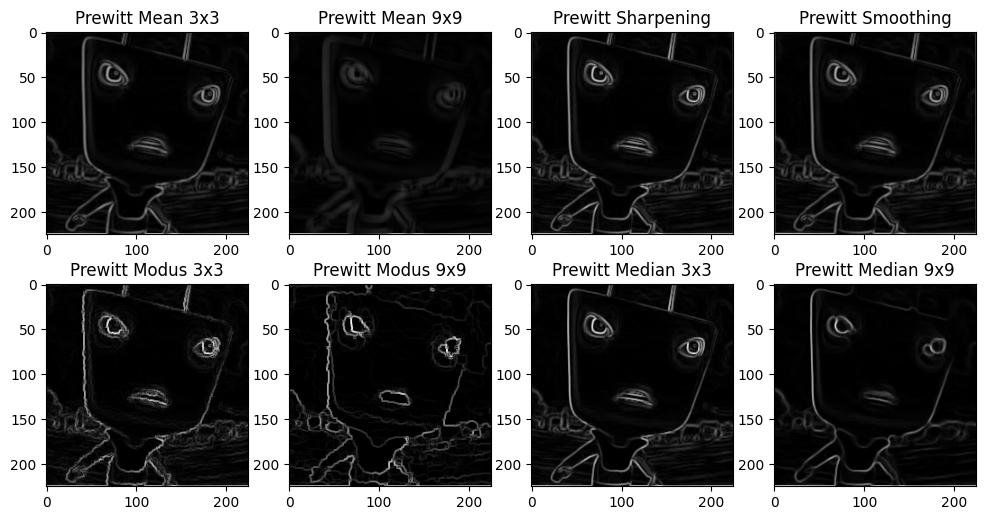

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs[0, 0].imshow(pre_mean3, 'gray')
axs[0, 1].imshow(pre_mean9, 'gray')
axs[0, 2].imshow(pre_sharpened, 'gray')
axs[0, 3].imshow(pre_smoothed, 'gray')
axs[1, 0].imshow(pre_modus3, 'gray')
axs[1, 1].imshow(pre_modus9, 'gray')
axs[1, 2].imshow(pre_median3, 'gray')
axs[1, 3].imshow(pre_median9, 'gray')

axs[0, 0].set_title('Prewitt Mean 3x3')
axs[0, 1].set_title('Prewitt Mean 9x9')
axs[0, 2].set_title('Prewitt Sharpening')
axs[0, 3].set_title('Prewitt Smoothing')
axs[1, 0].set_title('Prewitt Modus 3x3')
axs[1, 1].set_title('Prewitt Modus 9x9')
axs[1, 2].set_title('Prewitt Median 3x3')
axs[1, 3].set_title('Prewitt Median 9x9')
plt.show()


(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

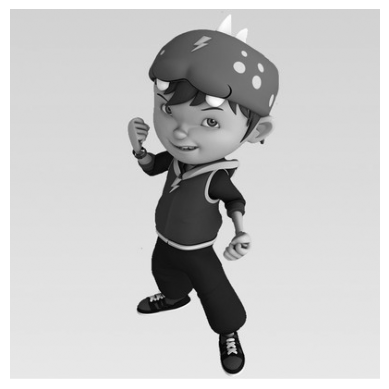

In [95]:
bby = plt.imread('Assets/boboiboy.jpg')
bby_gray = cv.cvtColor(bby, cv.COLOR_BGR2GRAY)
plt.imshow(bby_gray, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

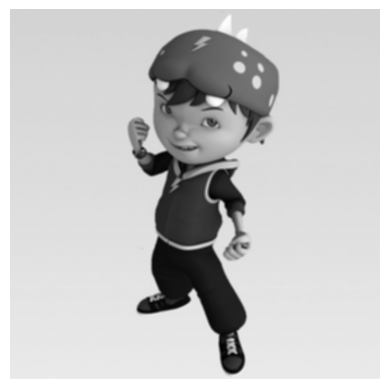

In [ ]:
bby_mean = filter_mean(bby_gray, 3)
plt.imshow(bby_mean, cmap='gray')
plt.axis('off')

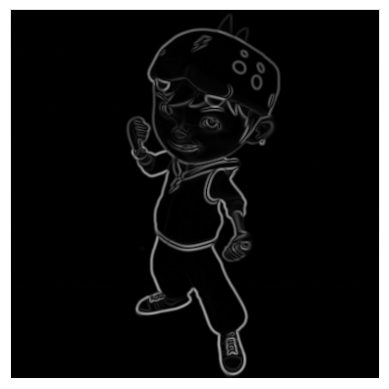

In [68]:
bby_pre_mean3, bby_prex_mean3, bby_prey_mean3 = sobel_prewitt(bby_mean, px, py)
plt.imshow(bby_pre_mean3, 'gray')
plt.axis('off')
plt.show()

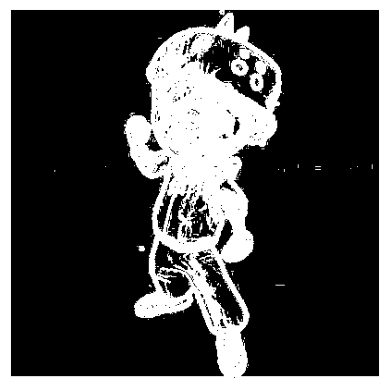

In [92]:
def putihkan_bagian_dalam(gambar, batas):
    m, n = gambar.shape
    out = np.zeros_like(gambar, dtype=float)
    
    for i in range(m):
        for j in range(n):
            if gambar[i, j] > batas:
                out[i, j] = 1.0
            else:
                out[i, j] = 0.0
    return out

def normalisasi(gambar):
    min_val = np.min(gambar)
    max_val = np.max(gambar)
    return (gambar - min_val) / (max_val - min_val)

normalisasi(bby_pre_mean3)
bby_ultra_instinct = putihkan_bagian_dalam(bby_pre_mean3, 4)
bby_ultra_instinct = normalisasi(bby_ultra_instinct)
plt.axis('off')

plt.imshow(bby_ultra_instinct, 'gray')

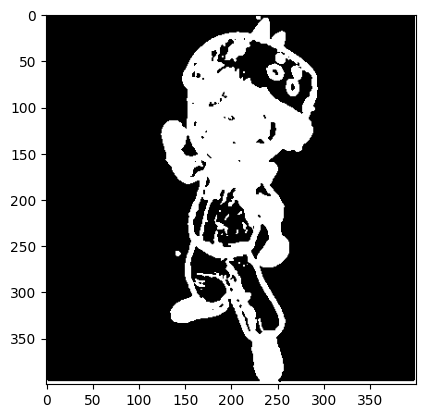

In [ ]:
bby_ui_median = filter_median(bby_ultra_instinct, 3)
bby_ui_median = bby_ui_median.astype(np.uint8)
plt.imshow(bby_ui_median, 'gray')

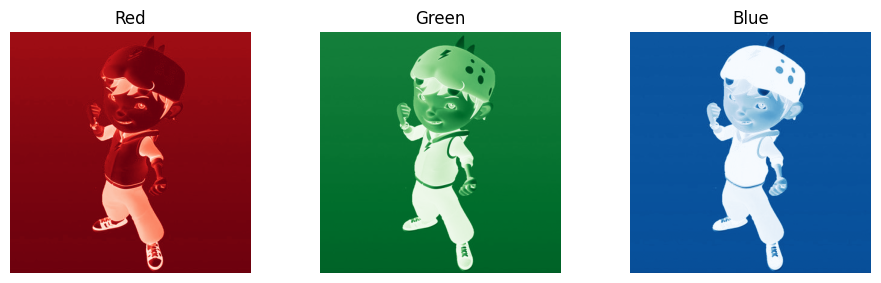

In [ ]:
red_bby = bby[:, :, 0]
green_bby = bby[:, :, 1]
blue_bby = bby[:, :, 2]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(red_bby, cmap='Reds')
plt.axis('off')
plt.title('Red')
plt.subplot(1, 3, 2)
plt.imshow(green_bby, cmap='Greens')
plt.axis('off')
plt.title('Green')
plt.subplot(1, 3, 3)
plt.imshow(blue_bby, cmap='Blues')
plt.axis('off')
plt.title('Blue')
plt.tight_layout(pad=5.0)
plt.show()
